<a href="https://colab.research.google.com/github/Giovasantoru/Credit-Score-Project/blob/main/Test_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/test.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

negative number for Num_Bank_account is not possible. The same could be said for Delay_from_due_date.

In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [ ]:
# dropping unnecessary columns
df = df.drop(['ID','Name', 'Month','SSN', 'Amount_invested_monthly','Type_of_Loan'], axis = 1)

In [ ]:
df.shape

(50000, 21)

We can see that the oldest client has 39 years old, and that the longest history age in 20 years and 1 month long. There is also a client with 19 delayed payment.
Age has 922 unique values, that indicates some anomalies in the data.

The variable Payment of Min amounth indicates if a person has met the minimum payment amounth. **NM: for those entries, the information about whether the minimum amount was paid is missing or not specified.**


# **Data Cleaning**



1.   Check for duplicates and remove them if necessary.

2.   Verify the data types of each column and convert them if needed.
    
3.   Check for missing values and handle them appropriately.   





In [ ]:
df.duplicated().sum() #counting duplicates

0

There are no duplicates in the dataframe


Now let's check for missing values

In [ ]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               50000 non-null  object 
 1   Age                       50000 non-null  object 
 2   Occupation                50000 non-null  object 
 3   Annual_Income             50000 non-null  object 
 4   Monthly_Inhand_Salary     42502 non-null  float64
 5   Num_Bank_Accounts         50000 non-null  int64  
 6   Num_Credit_Card           50000 non-null  int64  
 7   Interest_Rate             50000 non-null  int64  
 8   Num_of_Loan               50000 non-null  object 
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    46502 non-null  object 
 11  Changed_Credit_Limit      50000 non-null  object 
 12  Num_Credit_Inquiries      48965 non-null  float64
 13  Credit_Mix                50000 non-null  object 
 14  Outsta

It appears there are some missing values through the Non-null count. In particoular we have 50000 entries, but Credit_History_Age has only 45530 non-null values, also number of credit inquiries and number of delayed payment have some missing values.
In respect of the data types, we can notice that age, annual income, number of loans, number of delayed payments, outstanding debts, credit history age and monthly balance are classified as objects (strings), thus we need to change to the correct data type lately.



We also noticed that some missing values are written as '_', so we need to transform them into actual NaN values in order to use Python functions related to missing values, such as isna(), fillna(), dropna(), and others for effective data cleaning and analysis.

In [ ]:
df = df.replace("_", "", regex=True) #replacing _ with empty string

In [ ]:
df[df.eq('').any(axis=1)] #checking for empty strings

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
4,CUS0x21b1,28,,34847.84,3037.986667,2,4,6,1,3,...,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,HighspentLargevaluepayments,485.2984336755923
6,CUS0x21b1,28,Teacher,34847.84,3037.986667,2,4,6,1,3,...,5.42,5.0,,605.03,30.996424,27 Years and 5 Months,No,18.816215,HighspentLargevaluepayments,452.30230675990265
7,CUS0x21b1,28,Teacher,34847.84,3037.986667,2,4,6,1,3,...,7.42,5.0,,605.03,33.875167,27 Years and 6 Months,No,18.816215,!@9#%8,421.44796447960783
13,CUS0xb891,55,Entrepreneur,30689.89,2612.490833,2,5,4,-100,5,...,1.99,4.0,,632.46,36.280475,18 Years and 0 Months,No,16.415452,HighspentLargevaluepayments,455.440320244524
16,CUS0x1cdb,22,Developer,35547.71,2853.309167,7,5,5,0,5,...,2.58,4.0,,943.86,34.729842,31 Years and 4 Months,Yes,0.000000,HighspentMediumvaluepayments,475.96485902210367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,CUS0xf16,45,MediaManager,16680.35,NaN,1,1,5,4,1,...,3.69,8.0,,897.16,25.793227,22 Years and 0 Months,NM,41.113561,LowspentLargevaluepayments,340.79630413992334
49991,CUS0xaf61,50,Writer,37188.1,3097.008333,1,4,5,3,3,...,5.38,3.0,,620.64,36.498383,30 Years and 8 Months,No,33013.000000,LowspentLargevaluepayments,257.095501010799
49994,CUS0x8600,29,,20002.88,1929.906667,10,8,29,5,33,...,18.31,12.0,Bad,3571.7,27.027812,6 Years and 6 Months,Yes,60.964772,HighspentSmallvaluepayments,341.179047488264
49995,CUS0x8600,4975,Architect,20002.88,1929.906667,10,8,29,5,33,...,18.31,12.0,,3571.7,34.780553,NaN,Yes,60.964772,LowspentSmallvaluepayments,275.53956951573343


In [ ]:
rows_with_empty_values = df[df.eq('').any(axis=1)]

# Fill empty values with np.nan in selected rows
df.loc[rows_with_empty_values.index] = df.loc[rows_with_empty_values.index].replace('', np.nan)

In [ ]:
# Fill empty values with np.nan for all blank values in the dataframe
df.replace('', np.nan, inplace=True)

In [ ]:
#Check for columns with missing values
df.columns[df.isna().any()]

Index(['Occupation', 'Monthly_Inhand_Salary', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Credit_History_Age', 'Monthly_Balance'],
      dtype='object')

In [ ]:
# Checking if there are still columns with blank strings
blank_count = (df == '').sum().sum()

print(blank_count)


0


The blank values have been succesfully reolaced

As we have blak values for some entries, we check for both NA and blank values:

The variables with the highest number of missing values are the credit history age, with 4470 missing values and Credit Mix with 9805.  

In [ ]:
#dropping negative values for Delay from due date
df.drop(df[df['Delay_from_due_date'] < 0].index, inplace=True)
print(df.shape)

(49702, 21)


In [ ]:
print(df[df['Num_Bank_Accounts'] < 0]['Num_Bank_Accounts'].count()) #counting negative values for Num_Bank_Accounts
df.drop(df[df['Num_Bank_Accounts'] < 0].index, inplace=True)
print(df.shape)

16
(49686, 21)


In [ ]:
df['Credit_Mix'].describe()

,Credit_Mix
count,39935
unique,3
top,Standard
freq,18379


We can notive a lot of high numbers, we should get rid of them.

In [ ]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce') #converting to numeric

High presence of outliers with implausible age values.

In [ ]:
print(df['Age'].min())
df[df['Age'] < 0]['Age'].unique()

-500


array([-500])

There are 500 unique negative age values.

In [ ]:
df[df['Age'] > 100]['Age'].nunique() #checking for age greater than 100

877

Also a lot of implausible high values, thus we replace these values with null values, in order to fill them with the age of the customer id reported in the other rows.

In [ ]:
# Replace invalid ages with NaN
df.loc[(df['Age'] > 100) | (df['Age'] < 0), 'Age'] = np.nan

# Fill NaN values with a down-up approach, resetting index to match df
df['Age'] = df.groupby('Customer_ID')['Age'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(level=0, drop=True)
# The .reset_index(level=0, drop=True) part is crucial. It resets the index of the Series
# resulting from the groupby and apply operations, aligning it with the DataFrame df.
# The level=0 indicates the first level of the index (since groupby creates a multi-index),
# and drop=True removes the old index.

<ipython-input-23-8327d8b6ebfd>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age'] = df.groupby('Customer_ID')['Age'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(level=0, drop=True)


In [ ]:
print(df.shape)
print(df['Age'].nunique())

(49686, 21)
44


44 unique age values is a plausible number.

Most of the clients are between 20 and 45 years old.

In [ ]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce') #converting to numeric
df[df['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].unique()

array([-1., -2., -3.])

In [ ]:
df.drop(df[df['Num_of_Delayed_Payment'] < 0].index, inplace = True) #dropping rows with negative values

In [ ]:
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float) #converting to float

In [ ]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df[df['Num_of_Loan'] < 0]['Num_of_Loan'].unique() #converting to numeric and checking if there are negative values

array([-100])

In [ ]:
df.drop(df[df['Num_of_Loan'] < 0].index, inplace = True) #dropping rows with negative values

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Num_of_Loan'].quantile(0.25)
Q3 = df['Num_of_Loan'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#dropping outliers
df.drop(df[df['Num_of_Loan'] > upper_bound].index, inplace = True)

In [ ]:
df.shape[0] #numer of rows only

47206

In [ ]:
df['Num_Credit_Card'].describe()

,Num_Credit_Card
count,47206.000000
mean,22.757743
std,128.375387
min,0.000000
25%,4.000000
50%,6.000000
75%,7.000000
max,1499.000000


In [ ]:
df.loc[(df['Num_Credit_Card'] > 11), 'Num_Credit_Card'] = np.nan

df['Num_Credit_Card'] = df.groupby('Customer_ID')['Num_Credit_Card'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(level=0, drop=True)

<ipython-input-33-4d0f29cac692>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Num_Credit_Card'] = df.groupby('Customer_ID')['Num_Credit_Card'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(level=0, drop=True)


Now we need to adjust the credit histoy age into a date type

In [ ]:
df['Credit_History_Age']

,Credit_History_Age
0,22 Years and 9 Months
1,22 Years and 10 Months
3,23 Years and 0 Months
4,27 Years and 3 Months
5,27 Years and 4 Months
...,...
49995,NaN
49996,31 Years and 11 Months
49997,32 Years and 0 Months
49998,32 Years and 1 Months


In [ ]:
df['Credit_History_Age'].nunique() #checking unique values

399

In [ ]:
# Function to extract years and months
def extract_years_months(Credit_History_Age):
    import re
    # Handle non-string values
    if not isinstance(Credit_History_Age, str):
        return None, None
    match = re.match(r'(\d+) Years and (\d+) Months', Credit_History_Age)
    if match:
        years = int(match.group(1))
        months = int(match.group(2))
        return years, months
    return None, None

# Apply the function to the column and create new columns
df[['Years', 'Months']] = df['Credit_History_Age'].apply(lambda x: pd.Series(extract_years_months(x)))

# Convert the total credit history age into months
df['Total_Months'] = df['Years'] * 12 + df['Months']


We can see from the distribution that the highest frequency is between 200 and 250 months

In [ ]:
df.dropna(subset=["Total_Months"], inplace=True) #filling missing values with mean


In [ ]:
df.drop('Credit_History_Age', axis = 1, inplace = True) #dropping column as I already converted the values in months as float

Number Of Credit Inquiries

That looks like 2593.0 credit inquiries is not a plausible number for a typical individual. This number is extremely high and probably indicates an anomaly or error in the data. Let's see how many of these high values are in the dataset.

The median is 7 inquiries, THE 3RD QUARTILE IS 10, the max value is clearly anomalous as the other tail values we have observed.

Let's check the ouliers using the Interquartile Range (IQR) method

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Num_Credit_Inquiries'].quantile(0.25)
Q3 = df['Num_Credit_Inquiries'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Num_Credit_Inquiries'] < lower_bound) | (df['Num_Credit_Inquiries'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

# Display the number of outliers
num_outliers


743

We have 722 outliers for the variable number of credit inquiries.

Now we can clearly visualize the outliers, let's drop them.

In [ ]:
df.loc[(df['Num_Credit_Inquiries'] < lower_bound) | (df['Num_Credit_Inquiries'] > upper_bound), 'Num_Credit_Inquiries'] = np.nan
# Reset index after groupby to align with original DataFrame
df['Num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(level=0, drop=True)

<ipython-input-40-62693642ffe2>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(level=0, drop=True)


We can see that the distribution has now only plausible values, with a max value of 17 inquiries.

In [ ]:
# IQR
Q1 = df['Num_of_Delayed_Payment'].quantile(0.25)
Q3 = df['Num_of_Delayed_Payment'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.drop(df[df['Num_of_Delayed_Payment'] > upper_bound].index, inplace = True) #dropping outliers
df.drop(df[df['Num_of_Delayed_Payment'] < lower_bound].index, inplace = True)

In [ ]:
df.shape[0]

42645

# Monthly Balance



In [ ]:
#Converting the monthly balance into numeric type
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

In [ ]:
#IQR
Q1 = df['Monthly_Balance'].quantile(0.25)
Q3 = df['Monthly_Balance'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
df.drop(df[df['Monthly_Balance'] < lower_bound].index, inplace = True) #dropping outliers
df.drop(df[df['Monthly_Balance'] > upper_bound].index, inplace = True)

In [ ]:
#IQR
Q1 = df['Total_EMI_per_month'].quantile(0.25)
Q3 = df['Total_EMI_per_month'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
df.drop(df[df['Total_EMI_per_month'] < lower_bound].index, inplace = True) #dropping outliers
df.drop(df[df['Total_EMI_per_month'] > upper_bound].index, inplace = True)

# **Now let's check the categorical variables**


In [ ]:
# Replace '!@9#%8' with NaN
df['Payment_Behaviour'].replace('!@9#%8', pd.NA, inplace=True)

# Impute missing values with mode
mode_value = df['Payment_Behaviour'].mode()[0]
df['Payment_Behaviour'].fillna(mode_value, inplace=True)

In [ ]:
df['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
LowspentSmallvaluepayments,12956
HighspentMediumvaluepayments,6093
LowspentMediumvaluepayments,5207
HighspentSmallvaluepayments,4301
LowspentLargevaluepayments,4014
HighspentLargevaluepayments,3764


In [ ]:
df.drop(['Years', 'Months'], axis = 1, inplace = True) #dropping unnecessary columns

In [ ]:
df["Changed_Credit_Limit"] = pd.to_numeric(df["Changed_Credit_Limit"], errors="coerce")
df["Changed_Credit_Limit"].fillna(df["Changed_Credit_Limit"].mean(), inplace=True)

<Axes: >

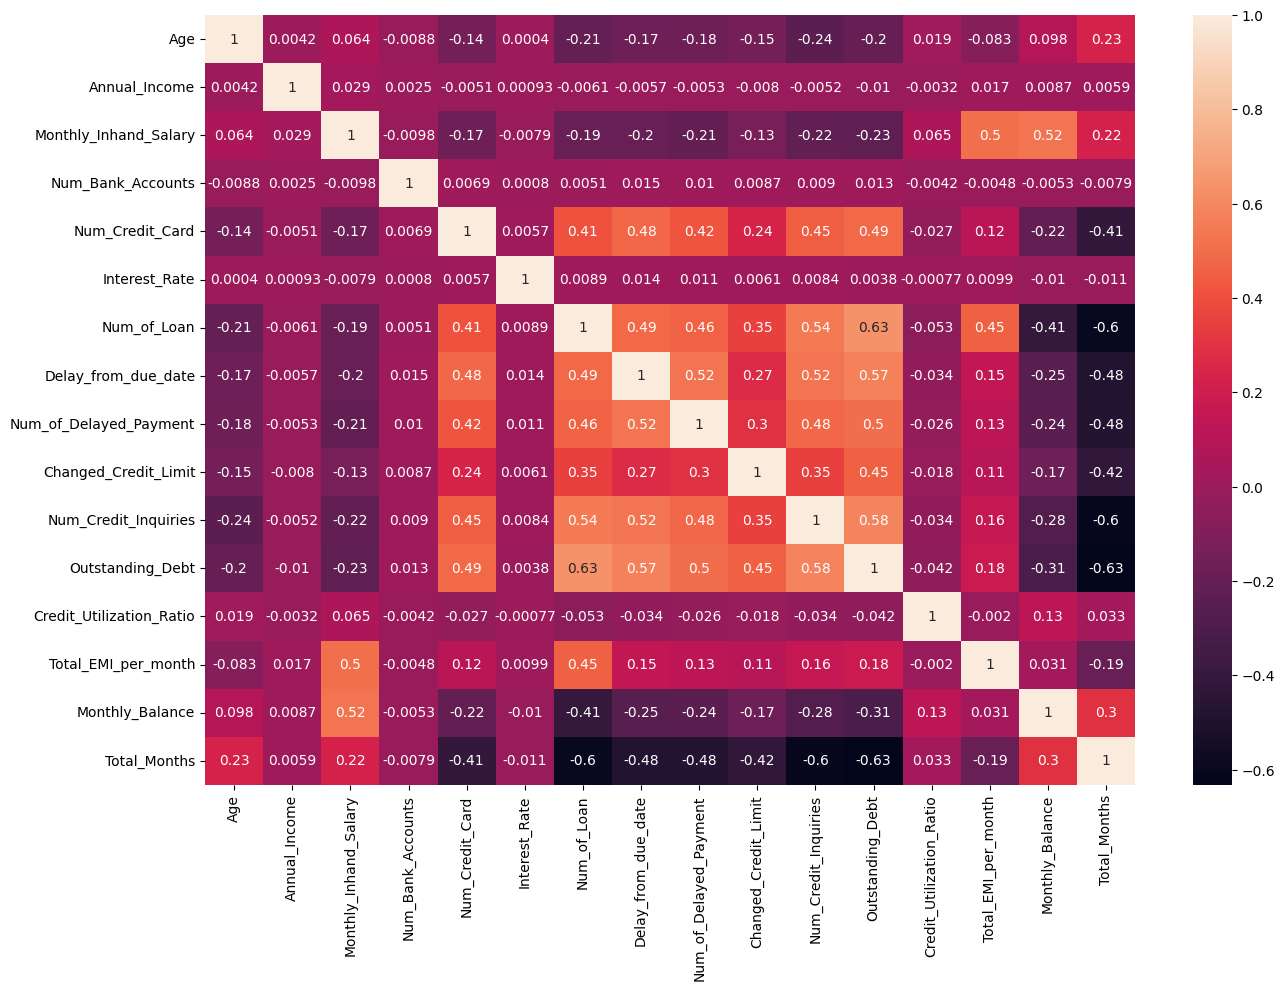

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot = True)

## Since we want to see the correlation matrix including the categorical variables also, which are encoded as objects, we should map them to numerical values to perform the correlation analysis and use them for grouping and imputation.#

In [ ]:
# Select non-numerical columns
non_numerical_cols = df.select_dtypes(include=["object"]).columns

# Print the non-numerical columns
print(non_numerical_cols)


Index(['Customer_ID', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object')


Map them in numerical variables

In [ ]:
# Define the mapping for the Credit_Mix column
credit_map = {"Good": 3, "Standard": 2, "Bad": 1}  # Invert the scale to reflect ordinal nature
df['Credit_Mix'] = df['Credit_Mix'].replace(credit_map)

In [ ]:
pay_map = {"Yes": 3, "No": 1, "NM": 2}  # Adjusted to reflect positive and negative behaviors
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(pay_map)

In [ ]:
def convert_payment_behaviour(value):
    value = value.replace('Lowspent', 'Low_spent_').replace('Highspent', 'High_spent_')
    value = value.replace('Smallvaluepayments', 'Small_value_payments')
    value = value.replace('Mediumvaluepayments', 'Medium_value_payments')
    value = value.replace('Largevaluepayments', 'Large_value_payments')
    return value

# Apply the function to the 'Payment_Behaviour' column
df['Payment_Behaviour'] = df['Payment_Behaviour'].apply(convert_payment_behaviour)


In [ ]:


category_ranking = {
    'High_spent_Large_value_payments': 1,
    'High_spent_Medium_value_payments': 2,
    'High_spent_Small_value_payments': 3,
    'Low_spent_Large_value_payments': 4,
    'Low_spent_Medium_value_payments': 5,
    'Low_spent_Small_value_payments': 6
}
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace(category_ranking)

In [ ]:
df['Occupation'] = df.groupby('Customer_ID')['Occupation'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(level=0, drop=True)  # Filling missing values

<ipython-input-58-94616612fcd0>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Occupation'] = df.groupby('Customer_ID')['Occupation'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(level=0, drop=True)  # Filling missing values


In [ ]:
df['Occupation'].dtype #checking data type

dtype('O')

**Transforming Type of Loan in numeric**

When dealing with variables that contain lists of categories (like your "Type of Loan" variable where each individual can have multiple types of loans), I have several options to transform this data for use in machine learning models. Here are some common methods:

Multi-label Binarizer:
This method converts the lists of loan types into a binary matrix where each type of loan has its own column, and the presence of a loan type is indicated by 1.

In [ ]:
# Calculate the correlation matrix
df_without_strings = df.drop(columns=['Occupation', "Customer_ID"]) #dropping occupation since it's a string type

# Calculate the correlation matrix without 'Occupation'
correlation_matrix = df_without_strings.corr()

# Identify the variable with the highest correlation with 'Num_of_Delayed_Payment'
high_corr_var = correlation_matrix['Num_of_Delayed_Payment'].sort_values(ascending=False).index[1]  # Index [1] to skip self-correlation

print(f"Variable with highest correlation to 'Num_of_Delayed_Payment': {high_corr_var}")

Variable with highest correlation to 'Num_of_Delayed_Payment': Payment_of_Min_Amount


In [ ]:
#Since Credit Mix has a lot of missing values, we are going to try with the second most correlated variable
high_corr_var_2 = correlation_matrix['Num_of_Delayed_Payment'].sort_values(ascending=False).index[2]  # Index [2]

print(f"Variable with second highest correlation to 'Num_of_Delayed_Payment': {high_corr_var_2}")

Variable with second highest correlation to 'Num_of_Delayed_Payment': Delay_from_due_date


In [ ]:
df['Delay_from_due_date'].isna().sum()

0

In [ ]:
# Group by the highly correlated variable and calculate the median for 'Num_of_Delayed_Payment' within each group
median_by_group = df.groupby('Delay_from_due_date')['Num_of_Delayed_Payment'].transform('median')

# Fill NaN values in 'Num_of_Delayed_Payment' with the median for each group
df['Num_of_Delayed_Payment'].fillna(median_by_group, inplace=True)

# Check the result
print(df['Num_of_Delayed_Payment'].isna().sum())

0


We do the same for the number of credit inquiries

In [ ]:
high_corr_var_num_credit_inquiries = correlation_matrix['Num_Credit_Inquiries'].sort_values(ascending=False).index[1]  # Index [1] to skip self-correlation

print(f"Variable with highest correlation to 'Num_Credit_Inquiries': {high_corr_var_num_credit_inquiries}")

high_corr_var_num_credit_inquiries = correlation_matrix['Num_Credit_Inquiries'].sort_values(ascending=False).index[2]

print(f"Variable with second highest correlation to 'Num_Credit_Inquiries': {high_corr_var_num_credit_inquiries}")

Variable with highest correlation to 'Num_Credit_Inquiries': Outstanding_Debt
Variable with second highest correlation to 'Num_Credit_Inquiries': Payment_of_Min_Amount


In [ ]:
# Group by the highly correlated variable and calculate the median for 'Num_of_Delayed_Payment' within each group
median_by_group_inq = df.groupby('Outstanding_Debt')['Num_Credit_Inquiries'].transform('median')

# Fill NaN values in 'Num_of_Delayed_Payment' with the median for each group
df['Num_Credit_Inquiries'].fillna(median_by_group_inq, inplace=True)

# Check the result
print(df['Num_Credit_Inquiries'].isna().sum())

7


In [ ]:
#counting missing values
df.isna().sum()

,0
Customer_ID,0
Age,0
Occupation,78
Annual_Income,0
Monthly_Inhand_Salary,5455
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0


The distribution of 'Total Months' appears to be negatively skewed, thus using the median to fill NaN values might be a more robust choice since it is less affected by skewness and outliers.

In [ ]:
df['Num_of_Delayed_Payment'].isna().sum()

0

In [ ]:
df['Monthly_Balance'].isna().sum()

333

In [ ]:
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(level=0, drop=True)

<ipython-input-72-23688a7b9b60>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(level=0, drop=True)


# Before using the KNN imputer to impute the missing values for Credit Mix, We round the numerical variables to the second decimal place and transform the variable into numerical trough mapping it.

In [ ]:
def round_to_two_decimals(value):
    """
    Rounds a given value to two decimal places.

    Parameters:
    value (float): The value to be rounded.

    Returns:
    float: The value rounded to two decimal places.
    """
    return round(value, 2)

In [ ]:
# List of columns to round to two decimal places
columns_to_round = [
    'Total_EMI_per_month', 'Annual_Income', 'Monthly_Balance', 'Outstanding_Debt',
    'Credit_Utilization_Ratio', 'Monthly_Inhand_Salary', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Changed_Credit_Limit',
    'Num_of_Loan', 'Num_Credit_Card'
]

In [ ]:
for column in columns_to_round:
    df[column] = df[column].apply(round_to_two_decimals)

# **KNN Algorithm**

In [ ]:
def get_numerical_df(df):
    """
    Extract only the numerical columns from a DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame.

    Returns:
    DataFrame: A DataFrame containing only the numerical columns.
    """
    # Select only the numerical columns
    numerical_df = df.select_dtypes(include=['number'])

    return numerical_df

In [ ]:
numerical_df = get_numerical_df(df) #getting only numerical columns

In [ ]:
numerical_df.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance',
       'Total_Months'],
      dtype='object')

In [ ]:
from sklearn.impute import KNNImputer

def knn_impute_specific_column(df, column_name, n_neighbors=5):
    """
    Fill missing values in a specific column using KNN imputation based on all numerical columns,
    ensuring that the imputed values for a categorical column only include the original categorical values.

    Parameters:
    df (DataFrame): The input DataFrame.
    column_name (str): The name of the column to be imputed.
    n_neighbors (int): Number of neighbors to consider for imputation. Default is 5.

    Returns:
    DataFrame: The DataFrame with the specified column imputed.
    """

    # Store original non-missing values
    original_values = df[column_name].copy()

    # Create an instance of the KNNImputer class
    imputer = KNNImputer(n_neighbors=n_neighbors)

    # Fit and transform the imputer to fill missing values in the numerical columns
    numerical_df_imputed = imputer.fit_transform(numerical_df)

    # Convert the result back to a DataFrame
    numerical_df_imputed = pd.DataFrame(numerical_df_imputed, columns=numerical_df.columns)

    # Get the imputed column values
    imputed_column = numerical_df_imputed[column_name]

    # Round the imputed values to the nearest valid category (1, 2, or 3)
    imputed_column_rounded = imputed_column.round().clip(1, 3)

    # Only update missing values in the original DataFrame
    df[column_name] = original_values.combine_first(imputed_column_rounded)

    return df

In [ ]:
imputed_df = knn_impute_specific_column(df, 'Monthly_Balance', n_neighbors=10)

In [ ]:
imputed_df = knn_impute_specific_column(df, 'Credit_Mix', n_neighbors=10)

In [ ]:
df.isna().sum()

,0
Customer_ID,0
Age,0
Occupation,78
Annual_Income,0
Monthly_Inhand_Salary,237
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0


In [ ]:
df.dropna(subset=["Credit_Mix"], inplace=True) #dropping missing values
df.dropna(subset=["Num_Credit_Inquiries"], inplace=True) #dropping missing values

In [ ]:
df.isna().sum()

,0
Customer_ID,0
Age,0
Occupation,76
Annual_Income,0
Monthly_Inhand_Salary,228
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0


In [ ]:
df.dropna(subset=["Credit_Mix"], inplace=True) #dropping missing values

Annual Income

### Classification Analysis with decision tree

In [ ]:
df.to_csv('test_df.csv', index=False)

##Now let's calculate the FICO credit score giving each variable it's weigh

# For variables like Number of Delayed Payment and Delay from due date, higher values indicate worse behavior, which should negatively impact the credit score. To properly incorporate these variables into the scoring system, I will adjust their contributions such that higher values reduce the overall score.